In [1]:
import img_utils
import naive_bayes
import logistic_regression
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
import pandas as pd
import matplotlib

%matplotlib inline


In [2]:
# load data
data = img_utils.load_dataset()

100%|██████████| 2269/2269 [00:18<00:00, 125.86it/s]


In [5]:
sizes = [1, 2, 4, 8, 16, 32, 64, 128]

In [6]:
metrics_nb = {label: {'mean':[], 'std':[]} for label in ['fit_time', 'score_time', 'test_score', 'train_score']}

for size in sizes:
    data_resize = img_utils.downsize_set(data, size)
    train, test = img_utils.stack(data_resize)
    train = train / 255
    model = naive_bayes.NaiveBayes()
    model.evaluate(train, test)
    pprint(model.metrics)
    for key in model.metrics:
        metrics_nb[key]['mean'].append(model.metrics[key].mean())
        metrics_nb[key]['std'].append(model.metrics[key].std())


{'fit_time': array([0.0063262 , 0.00633192, 0.00359774]),
 'score_time': array([0.00307488, 0.00324607, 0.00182009]),
 'test_score': array([0.56142668, 0.57142857, 0.56613757]),
 'train_score': array([0.56531085, 0.56278916, 0.56807667])}
{'fit_time': array([0.00624204, 0.00674796, 0.00463009]),
 'score_time': array([0.003546  , 0.04012012, 0.01469994]),
 'test_score': array([0.57859974, 0.58300265, 0.57638889]),
 'train_score': array([0.5787037 , 0.57931262, 0.58360872])}
{'fit_time': array([0.15363812, 0.04773188, 0.04396486]),
 'score_time': array([0.01698899, 0.06452894, 0.05724001]),
 'test_score': array([0.6003963 , 0.60482804, 0.60085979]),
 'train_score': array([0.59986772, 0.60095836, 0.60442829])}
{'fit_time': array([0.23933196, 0.11702919, 1.17050886]),
 'score_time': array([0.66473508, 0.61290193, 0.05171037]),
 'test_score': array([0.62153236, 0.61507937, 0.6167328 ]),
 'train_score': array([0.61574074, 0.61731659, 0.61996034])}
{'fit_time': array([0.34355283, 0.28903604, 

In [7]:
metrics_lr = {label: {'mean':[], 'std':[]} for label in ['fit_time', 'score_time', 'test_score', 'train_score']}

for size in sizes:
    data_resize = img_utils.downsize_set(data, size)
    train, test = img_utils.stack(data_resize)
    train = train / 255
    model = logistic_regression.LogisticRegression()
    model.evaluate(train, test)
    pprint(model.metrics)
    for key in model.metrics:
        metrics_lr[key]['mean'].append(model.metrics[key].mean())
        metrics_lr[key]['std'].append(model.metrics[key].std())

{'fit_time': array([0.43820405, 0.33579898, 0.33243203]),
 'score_time': array([0.00300097, 0.00154901, 0.00378275]),
 'test_score': array([0.59015852, 0.60284392, 0.59656085]),
 'train_score': array([0.60019841, 0.59087905, 0.59583609])}
{'fit_time': array([0.31214404, 0.31557727, 0.20643783]),
 'score_time': array([0.00155687, 0.00310493, 0.00122118]),
 'test_score': array([0.64597094, 0.63988095, 0.64517196]),
 'train_score': array([0.64021164, 0.64491077, 0.64375413])}
{'fit_time': array([0.53379989, 0.53390193, 0.42954373]),
 'score_time': array([0.00410104, 0.00221801, 0.00207019]),
 'test_score': array([0.69782034, 0.69411376, 0.70767196]),
 'train_score': array([0.70436508, 0.70588235, 0.69646398])}
{'fit_time': array([0.86915827, 0.87034774, 0.7783711 ]),
 'score_time': array([0.00347686, 0.00363421, 0.00354195]),
 'test_score': array([0.74207398, 0.73710317, 0.73511905]),
 'train_score': array([0.7485119 , 0.7452082 , 0.74669531])}
{'fit_time': array([4.3582201 , 4.25857806, 

In [21]:
nb = pd.DataFrame.from_dict({f'{label}_{sub_label}': metrics_nb[label][sub_label] for label in metrics_nb for sub_label in metrics_nb[label]})
nb = nb.rename({i: 2**i for i in range(9)}, axis='index')
nb.to_csv('nb_data.csv')

In [22]:
lr = pd.DataFrame.from_dict({f'{label}_{sub_label}': metrics_lr[label][sub_label] for label in metrics_lr for sub_label in metrics_lr[label]})
lr = lr.rename({i: 2**i for i in range(9)}, axis='index')
lr.to_csv('lr_data.csv')

In [23]:
nb

,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_score_mean,test_score_std,train_score_mean,train_score_std
1,0.005419,0.001288,0.002714,0.000636,0.566331,0.004086,0.565392,0.002159
2,0.005873,0.000903,0.019455,0.015305,0.579330,0.002749,0.580542,0.002183
4,0.081778,0.050836,0.046253,0.020905,0.602028,0.001989,0.601751,0.001944
8,0.508957,0.470445,0.443116,0.277573,0.617782,0.002737,0.617673,0.001741
16,0.304601,0.027727,0.746703,0.157788,0.629571,0.002397,0.629627,0.002550
32,5.741301,0.025444,0.868820,0.063449,0.641028,0.005638,0.642242,0.004375
64,26.435118,0.007130,3.187414,0.003798,0.646427,0.005298,0.647807,0.002910
128,409.238706,0.428806,111.845049,0.525332,0.646538,0.004278,0.648578,0.002618


In [24]:
# Naive Byaes Graphs

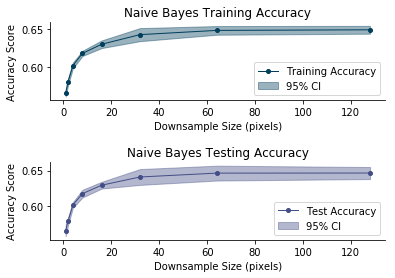

In [25]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], nb.index, 
                   list(nb['train_score_mean']), list(nb['train_score_std']), 
                   label="Training Accuracy", title="Naive Bayes Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], nb.index, 
                   list(nb['test_score_mean']), list(nb['test_score_std']), 
                   label="Test Accuracy", title="Naive Bayes Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/nb_graph_score.png', dpi=300, bbox_inches='tight')

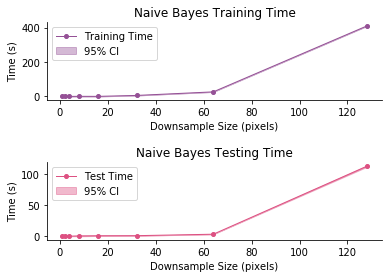

In [26]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], nb.index, 
                   list(nb['fit_time_mean']), list(nb['fit_time_std']), 
                   label="Training Time", title="Naive Bayes Training Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=2, loc="upper left")
img_utils.lineplot_ci(axs[1], nb.index, 
                   list(nb['score_time_mean']), list(nb['score_time_std']), 
                   label="Test Time", title="Naive Bayes Testing Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=3, loc="upper left")
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/nb_graph_time.png', dpi=300, bbox_inches='tight')

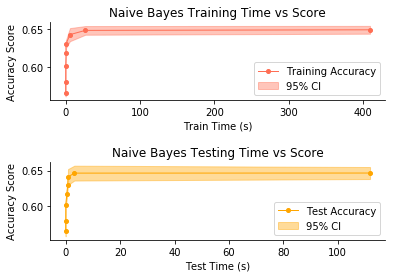

In [27]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], list(nb['fit_time_mean']), 
                   list(nb['train_score_mean']), list(nb['train_score_std']), 
                   label="Training Accuracy", title="Naive Bayes Training Time vs Score",
                   x_label="Train Time (s)", y_label="Accuracy Score",
                   color=4)
img_utils.lineplot_ci(axs[1], list(nb['score_time_mean']), 
                   list(nb['test_score_mean']), list(nb['test_score_std']), 
                   label="Test Accuracy", title="Naive Bayes Testing Time vs Score",
                   x_label="Test Time (s)", y_label="Accuracy Score",
                   color=5)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/nb_graph_time_score.png', dpi=300, bbox_inches='tight')

In [28]:
# Logistic Regression

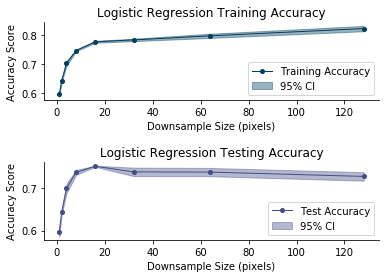

In [29]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], lr.index, 
                   list(lr['train_score_mean']), list(lr['train_score_std']), 
                   label="Training Accuracy", title="Logistic Regression Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], lr.index, 
                   list(lr['test_score_mean']), list(lr['test_score_std']), 
                   label="Test Accuracy", title="Logistic Regression Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/lr_graph_score.png', dpi=300, bbox_inches='tight')

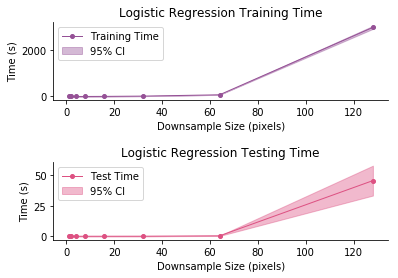

In [30]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], lr.index, 
                   list(lr['fit_time_mean']), list(lr['fit_time_std']), 
                   label="Training Time", title="Logistic Regression Training Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=2, loc="upper left")
img_utils.lineplot_ci(axs[1], lr.index, 
                   list(lr['score_time_mean']), list(lr['score_time_std']), 
                   label="Test Time", title="Logistic Regression Testing Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=3, loc="upper left")
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/lr_graph_time.png', dpi=300, bbox_inches='tight')

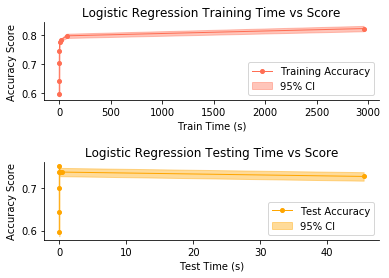

In [31]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], list(lr['fit_time_mean']), 
                   list(lr['train_score_mean']), list(lr['train_score_std']), 
                   label="Training Accuracy", title="Logistic Regression Training Time vs Score",
                   x_label="Train Time (s)", y_label="Accuracy Score",
                   color=4)
img_utils.lineplot_ci(axs[1], list(lr['score_time_mean']), 
                   list(lr['test_score_mean']), list(lr['test_score_std']), 
                   label="Test Accuracy", title="Logistic Regression Testing Time vs Score",
                   x_label="Test Time (s)", y_label="Accuracy Score",
                   color=5)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/lr_graph_time_score.png', dpi=300, bbox_inches='tight')